# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$$
    dQ(w) = d\left(\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)\right) = \dfrac{1}{\ell} d\left(\left( y - Xw \right)^T \left( y - Xw \right)\right)
    =\dfrac{1}{\ell} \left( d\left[\left( y - Xw \right)^T\right]\left( y - Xw \right) + {\left( y - Xw \right)^T}d\left[\left( y - Xw \right)\right] \right) = 
$$
$$
    = \dfrac{1}{\ell} \left( -\left( X dw\right)^T\left(y - Xw\right) - {\left( y - Xw \right)^T}{Xdw} \right) = / \text{Поскольку} \left( X dw\right)^T\left(y - Xw\right) - \text{скаляр, можно транспонировать} / =-2 \dfrac{1}{\ell} {\left( y - Xw \right)^T}{Xdw}
$$
$$
    dQ(w) = \nabla^T_w Q dw => \nabla_w Q = -2\dfrac{1}{\ell}X^T(y-Xw)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [68]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [70]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [71]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [72]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:  https://contest.yandex.ru/contest/70588/run-report/124071894/


* **StochasticDescent**:  https://contest.yandex.ru/contest/70588/run-report/124072909/


* **MomentumDescent**:  https://contest.yandex.ru/contest/70588/run-report/124079407/

* **Adam**:  https://contest.yandex.ru/contest/70588/run-report/124404811/


* **LinearRegression**:  https://contest.yandex.ru/contest/70588/run-report/124414249/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [73]:
import numpy as np
import pandas as pd  # оставим, потому что не всё работает с polars
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

# sns.set(style='darkgrid')
sns.set_theme(style='darkgrid') # мне пишет что set устарело(

In [74]:
data = pl.read_csv('autos.csv') 

In [75]:
data.head()

brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
str,str,str,str,str,str,i64,i64,i64,i64
"""volkswagen""","""golf""","""kleinwagen""","""manuell""","""benzin""","""nein""",75,150000,177,1500
"""skoda""","""fabia""","""kleinwagen""","""manuell""","""diesel""","""nein""",69,90000,93,3600
"""bmw""","""3er""","""limousine""","""manuell""","""benzin""","""ja""",102,150000,246,650
"""peugeot""","""2_reihe""","""cabrio""","""manuell""","""benzin""","""nein""",109,150000,140,2200
"""mazda""","""3_reihe""","""limousine""","""manuell""","""benzin""","""nein""",105,150000,136,2000


In [76]:
data.dtypes

[String, String, String, String, String, String, Int64, Int64, Int64, Int64]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

* `brand` - категориальный
* `model` - категориальный
* `vehicleType` - категориальный, смотрим на тип автомобильного кузова
* `gearbox` - тип трансмисcии, тоже категориальный
* `fuelType` - категориальный
* `notRepairedDamage` - категориальный
* `powerPS` - числовой, смотрим на разницу между мощностями двигателя
* `kilometer` - смотреть на разницу в пробеге есть смысл, на сколько она уже измотана
* `autoAgeMonths` - тоже числовой, на сколько машинке уже плохо, тоже часто зависит от возраста

### График распределения таргетной переменной

Text(0.5, 1.0, 'Логарифмированный X')

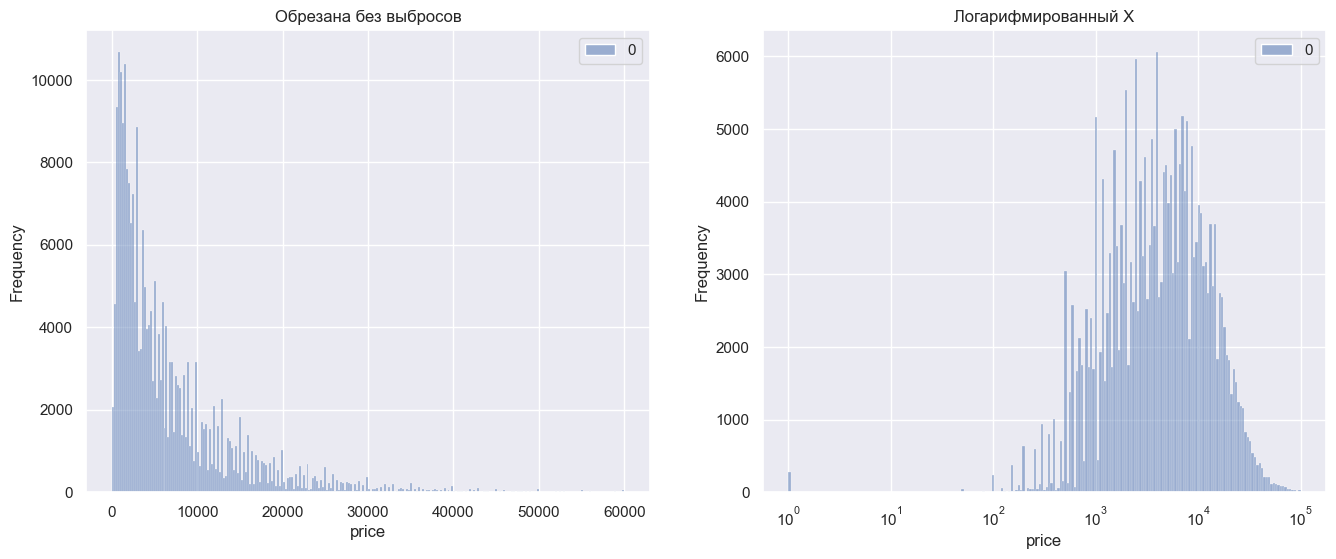

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(
    data.select(pl.col('price')),
    binrange=(0, 60000),
    ax = ax1
)
sns.histplot(
    data.select(pl.col('price')),
    log_scale=True,
    ax = ax2
)
ax1.set_xlabel('price')
ax1.set_ylabel('Frequency')
ax1.set_title('Обрезана без выбросов')
ax2.set_xlabel('price')
ax2.set_ylabel('Frequency')
ax2.set_title('Логарифмированный X')

Да, выбросы есть они после 60000 едениц (скорее всего доллары, поэтому далее буду так писать), судя по всему будет удобно логарифмировать целевую переменную, чтобы распределение было больше похоже на нормальное

Поэтому сначала обрежим выбросы, потом логарфимируем целевую переменную 

In [78]:
threshold_up = np.quantile(data['price'], 0.99)
threshold_down = np.quantile(data['price'], 0.01)
df = data.filter((pl.col('price') <= threshold_up) & (pl.col('price') >= threshold_down)) # для обучения модели буду ипользовать df
df = df.with_columns(
    np.log1p(pl.col('price').alias('log_price'))
)
df.shape

(236684, 11)

Text(0.5, 1.0, 'Логарифмированная таргетная переменная')

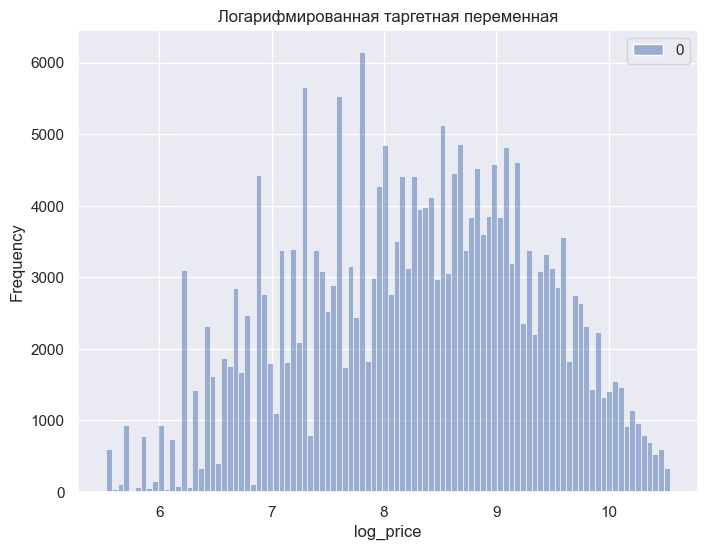

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=df.select(pl.col('log_price')),
    ax=ax
)
ax.set_xlabel('log_price')
ax.set_ylabel('Frequency')
ax.set_title('Логарифмированная таргетная переменная')

### Анализ переменных

посмотрим на новую таргетную переменную - логарифм цены в зависимости от:

#### 1. Brand

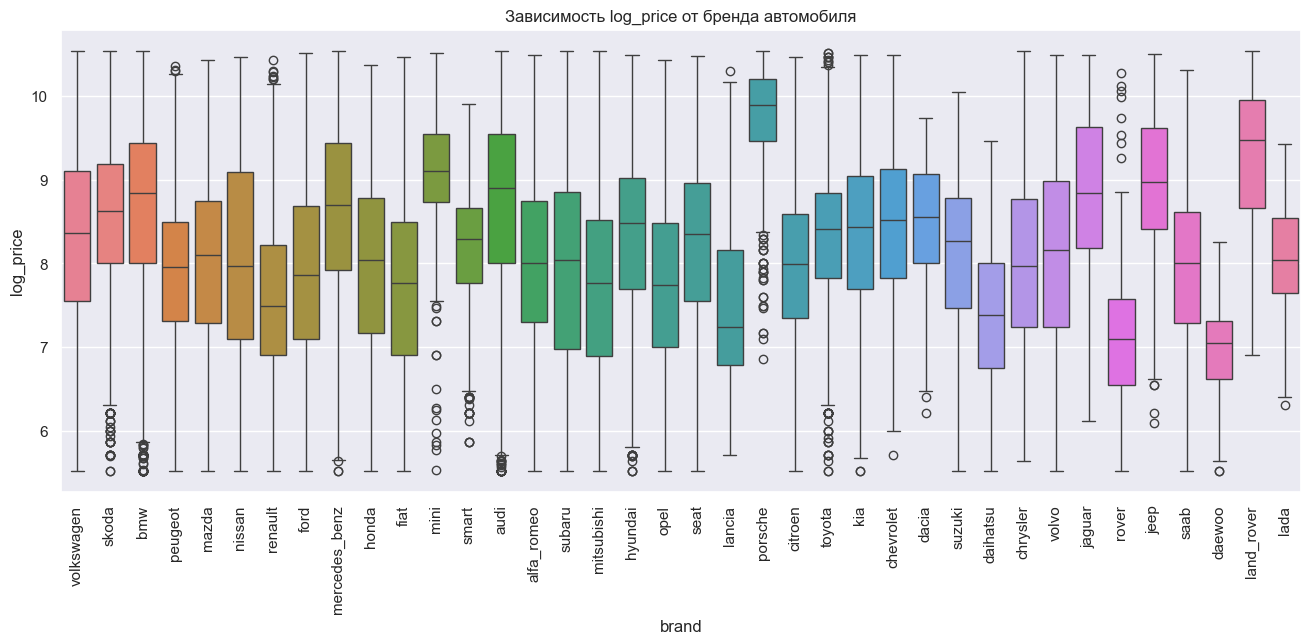

In [80]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='brand',
    y='log_price',
    hue='brand',
    ax=ax
)
plt.xticks(rotation=90)
ax.set_title("Зависимость log_price от бренда автомобиля")
plt.show()

видим, что в среднем $log(price) \approx 7,5 - 9$, и выбросы это чаще всего машины которые стоят дёшево, хотя у таких марок как renault, lancia, toyota, rover есть и очень дорогие машины

Также можно однозначно сказать, что как категориальные признаки они могут срабоать хорошо, поскольку есть бренди автомобилей, для которых высокая цена - это норма, а средняя цена по рынку - выброс (например porshe). Не думаю, что нужно добавлять новый признок люкосвая машина или нет, поскльку он будет учиться по брендам и должен понимать что дорогое по дефолту, что нет

#### 2. Model

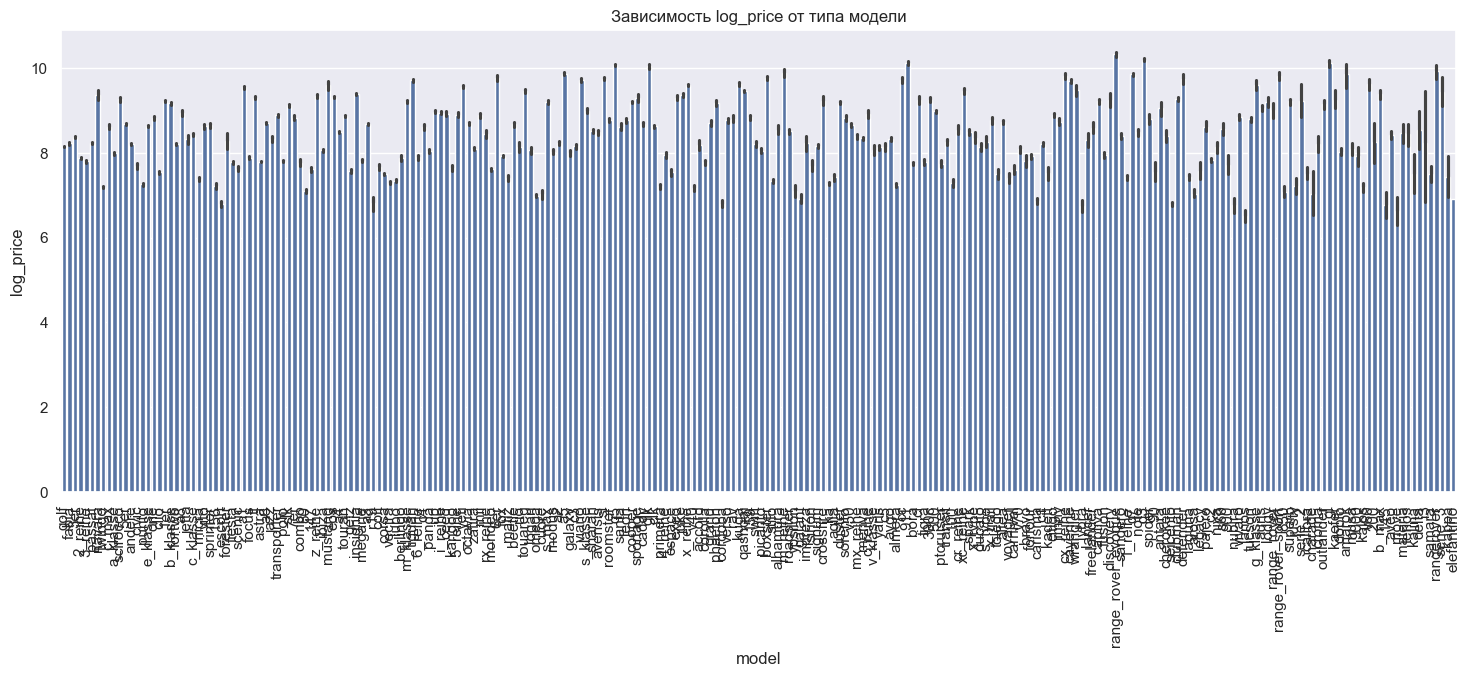

In [81]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(
    data=df,
    x='model',
    y='log_price',
    estimator='mean',
    ax=ax
)
plt.xticks(rotation=90)
ax.set_title("Зависимость log_price от типа модели")
plt.show()

тут грязь, попробуем другой график

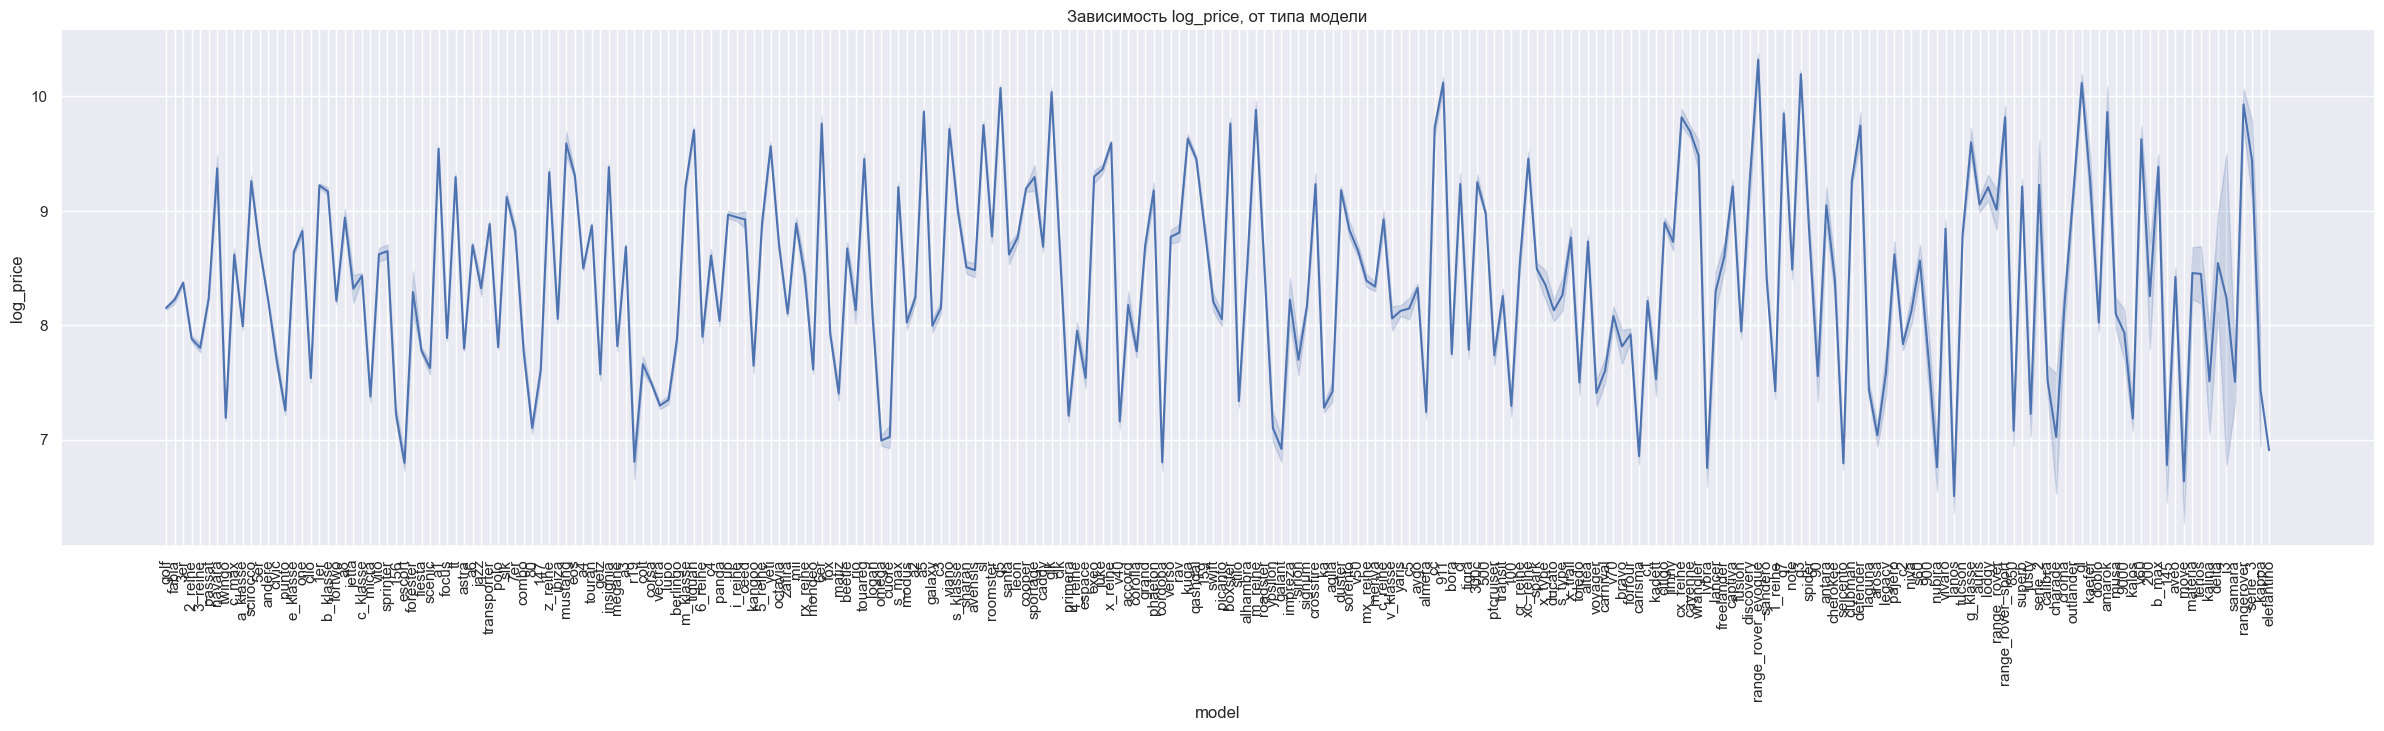

In [82]:
sns.relplot(
    data=df,
    x='model',
    y='log_price',
    kind='line',
    height=6,
    aspect=4
).set(title="Зависимость log_price, от типа модели")
plt.xticks(rotation=90)  
plt.show()

Средние цены колеблятся как мой сердечный ритм после пробежки, поэтому есть смысл их остаить, чтобы опираясь на модель автомобиля наша модель молгла лучше определить её цену

#### 3. Vehicle Type

In [83]:
df.select(pl.col('vehicleType').unique())

vehicleType
str
"""bus"""
"""kleinwagen"""
"""coupe"""
"""limousine"""
"""cabrio"""
"""kombi"""
"""suv"""
"""andere"""


Text(0.5, 1.0, 'Зависимость log_price от типа кузова')

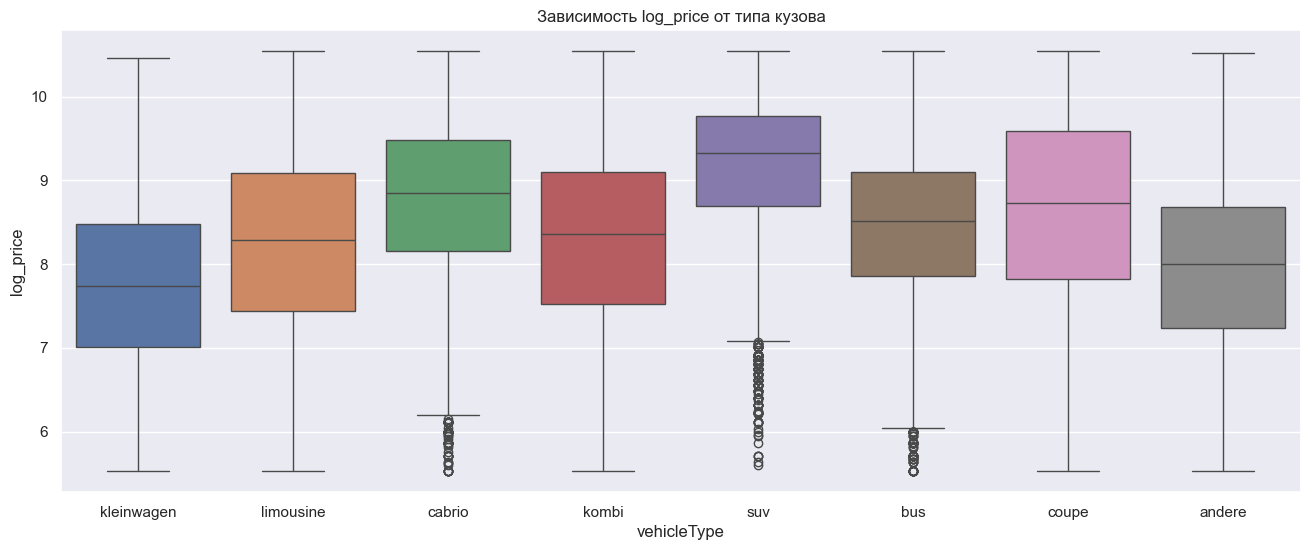

In [84]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='vehicleType',
    y='log_price',
    hue='vehicleType',
    ax=ax
)
ax.set_title("Зависимость log_price от типа кузова")

Самый приятный график который можно строить для катеогриального признка, как видим, кадый тип транспорта имеет разную серднюю цену и диапозон нормальных цен, поэтому этот признак стоить оставить для катгеориального

Можно уточнить, что в среднем спортивно-утилитарный автомобиль, ак suv, самые дорогие, а kleinwagen, самые дешёвые 

#### 4. Gearbox

In [85]:
df.select(pl.col('gearbox').unique())

gearbox
str
"""automatik"""
"""manuell"""


Text(0.5, 1.0, 'Зависимость log_price от коробки передач')

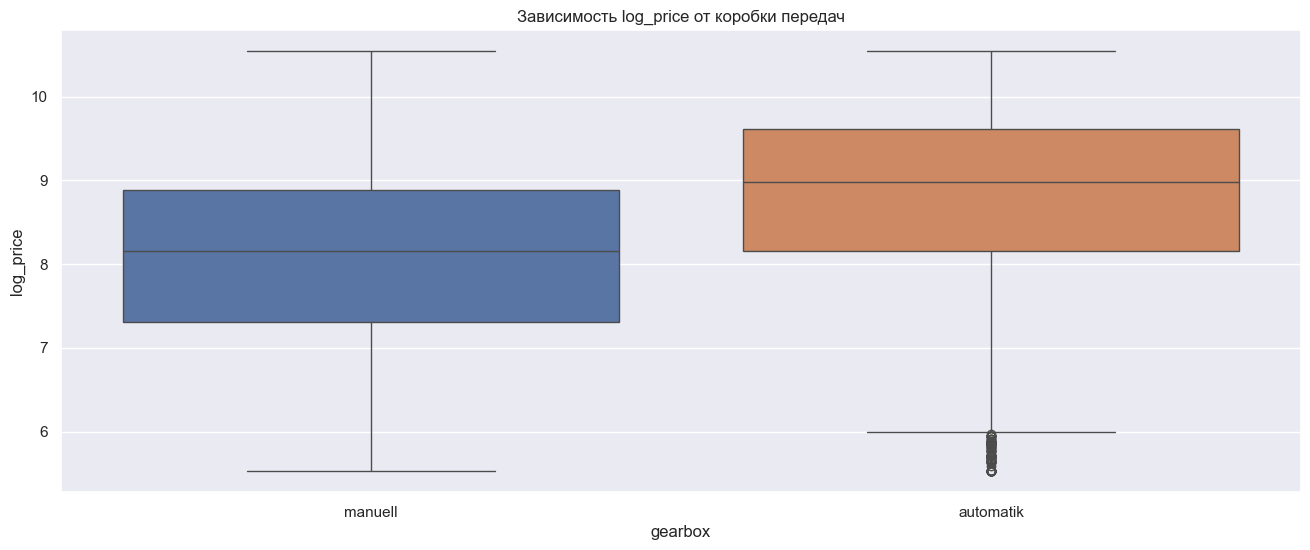

In [86]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='gearbox',
    y='log_price',
    hue='gearbox',
    ax=ax
)
ax.set_title("Зависимость log_price от коробки передач")

Также норм признка, устал уже повторять, автоматическая коробка обычно дороже, такчто норм, оставляем

#### 5. Fuel Type

Text(0.5, 1.0, 'Зависимость log_price от типа топлива')

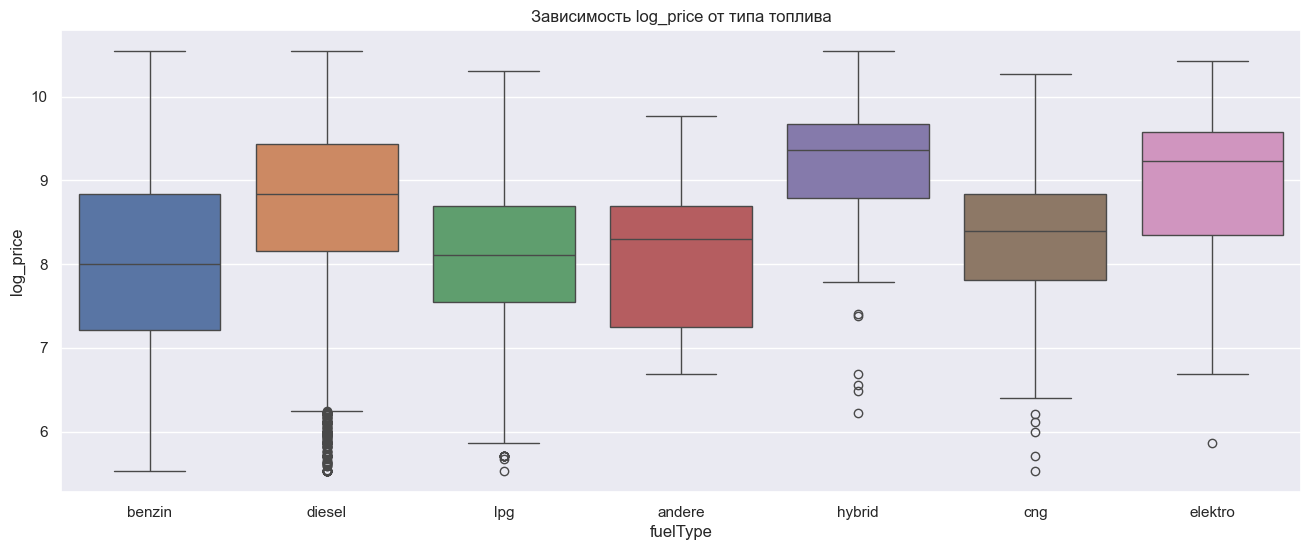

In [87]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='fuelType',
    y='log_price',
    hue='fuelType',
    ax=ax
)
ax.set_title("Зависимость log_price от типа топлива")

Аналогичные выводы, оставляем

В среднем самые дорогие автомобили - электрички, самые дешевые - бензиновые

#### 6. Not Repaired Damage

Text(0.5, 1.0, 'Зависимость log_price от типа неисправностей')

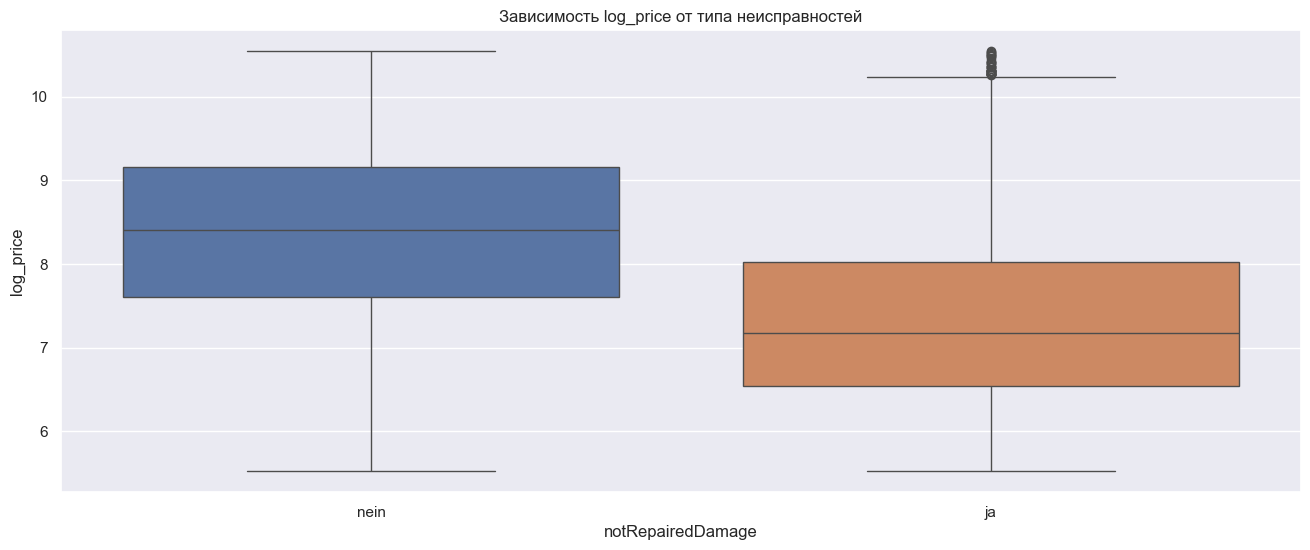

In [88]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='notRepairedDamage',
    y='log_price',
    hue='notRepairedDamage',
    ax=ax
)
ax.set_title("Зависимость log_price от типа неисправностей")

очев, если поломка есть, цена будет меньше, если автомобиль исправный то дороже

но в сломанных машинах есть выбросы, скорее всего это старая редкая машина, она дорого стоит и только кузов от неё стоит как вся моя жизнь, но это я проверю позже и если что создам новый признак рарная машинка

Оставляем

#### 7. Power PS

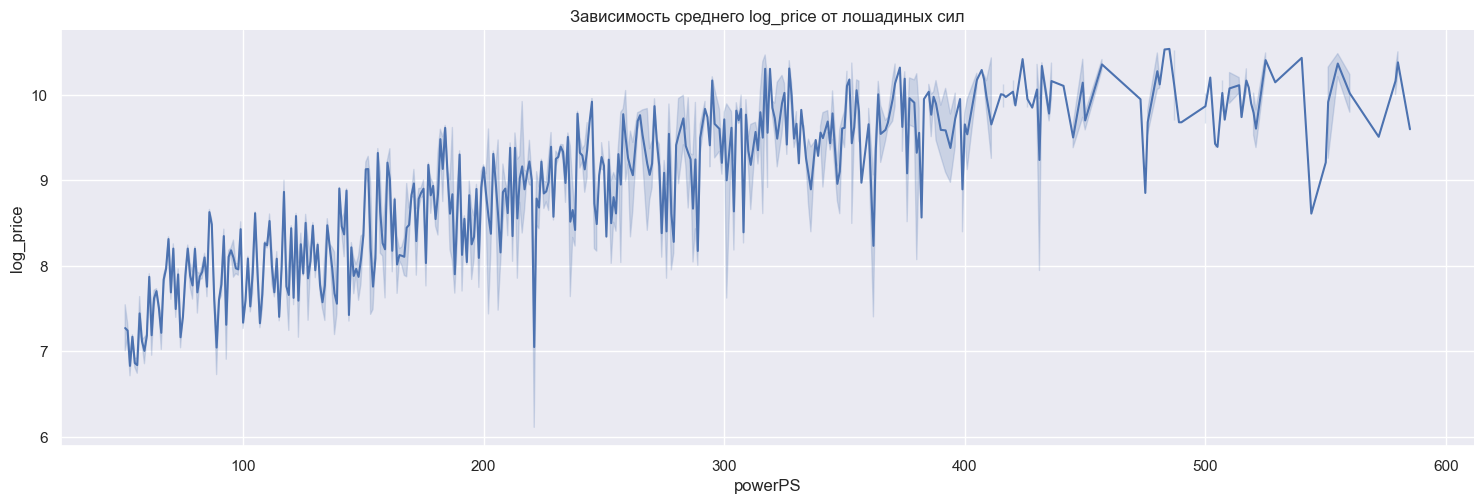

In [89]:
sns.relplot(
    data=df,
    x='powerPS',
    y='log_price',
    kind='line',
    height=5,
    aspect=3
).set(title='Зависимость среднего log_price от лошадиных сил')

видим восходящий тренд, чем мощнее наш двигатель, тем дороже машина, бывают конечно исключения, но предположу, что это не дорогие, но тяжёлые машины и в них по дефолту мощный двигаетль, но по факут люди смотрят не то чтобы на лошадиные силы, а на скорость, которая очень зависит от PS

Text(0.5, 1.0, 'Распределение Power PS')

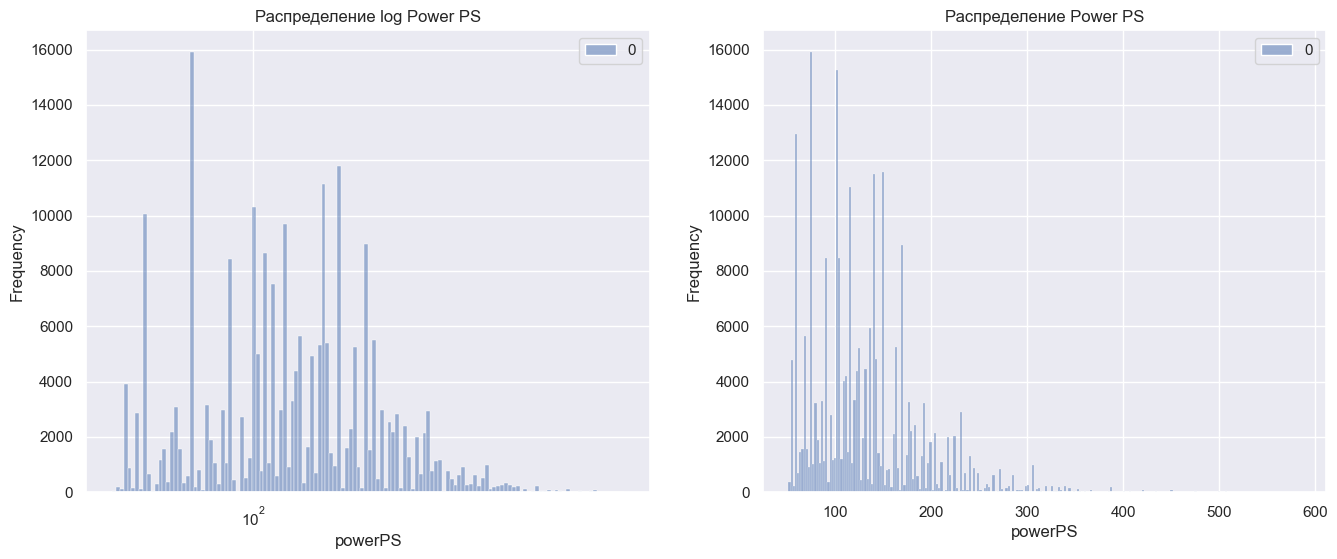

In [90]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(
    data=df.select(pl.col('powerPS')),
    ax=ax1,
    log_scale=True
)
sns.histplot(
    data=df.select(pl.col('powerPS')),
    ax=ax2
)
ax1.set_xlabel('powerPS')
ax1.set_ylabel('Frequency')
ax1.set_title('Распределение log Power PS')
ax2.set_xlabel('powerPS')
ax2.set_ylabel('Frequency')
ax2.set_title('Распределение Power PS')

Что так, что этак, распределение не оч, но логарифм больше похож на нормальное, такчто чекнем что лучше

In [91]:
cor = df.with_columns(
    np.log1p(pl.col('powerPS').alias('log_powerPS'))
).select(['log_price', 'powerPS', 'log_powerPS'])
cor.corr()

log_price,powerPS,log_powerPS
f64,f64,f64
1.0,0.530809,0.551629
0.530809,1.0,0.959503
0.551629,0.959503,1.0


Ну собсвенно корелляция отличается на 2 сотые, так что пох пох пох

#### 8. Kilometer

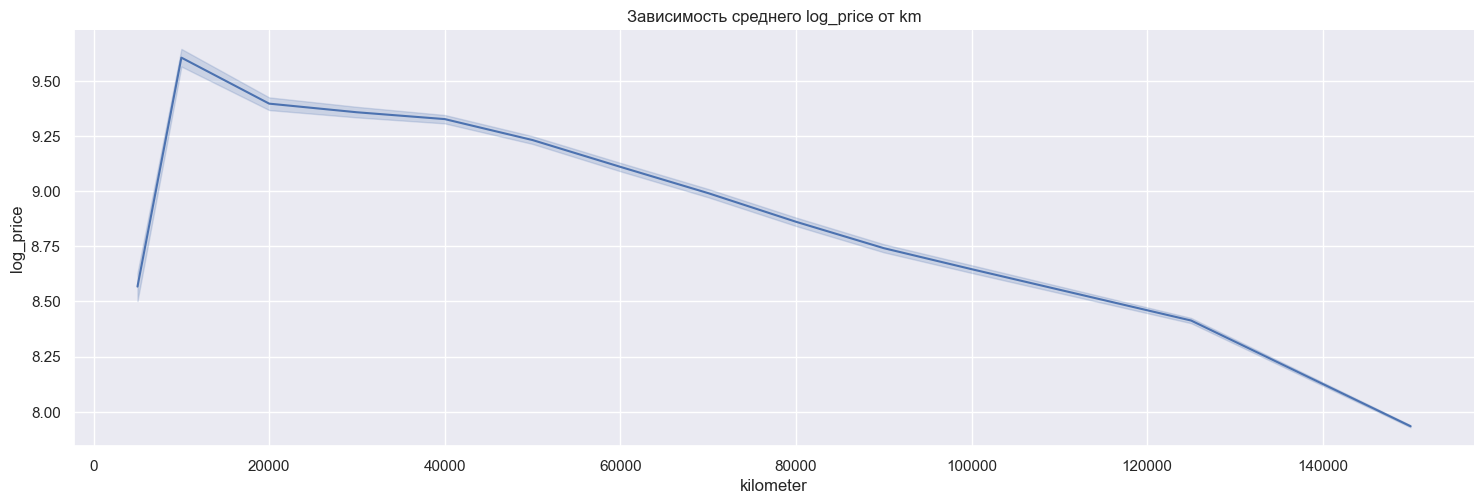

In [92]:
sns.relplot(
    data=df,
    x='kilometer',
    y='log_price',
    kind='line',
    height=5,
    aspect=3
).set(title='Зависимость среднего log_price от km')

Тренд линейно убывает, тогда точно он у нас числовой, в начале конечно почему-то возрастает, может люди не доверяют объявлениям, где люди сразу продают машину, и мало что могут про неё сказать, эт старнно конечно, или нет смысла покупать такую машину не у диллеров, хз

Text(0.5, 1.0, 'Распределение kilometer')

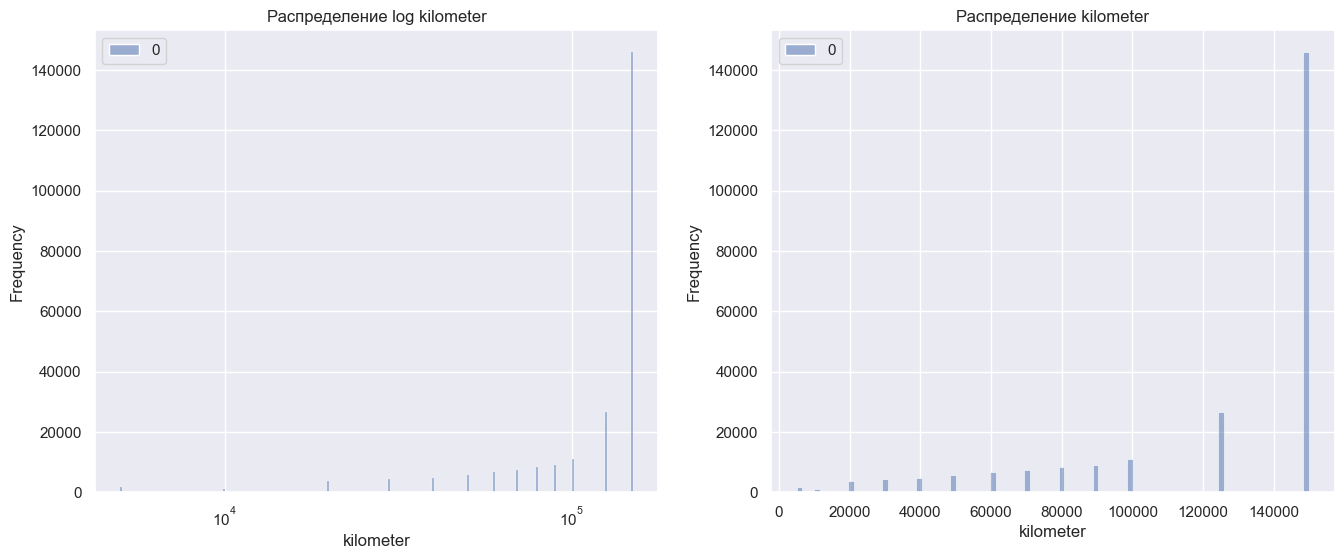

In [93]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(
    data=df.select(pl.col('kilometer')),
    ax=ax1,
    log_scale=True
)
sns.histplot(
    data=df.select(pl.col('kilometer')),
    ax=ax2
)
ax1.set_xlabel('kilometer')
ax1.set_ylabel('Frequency')
ax1.set_title('Распределение log kilometer')
ax2.set_xlabel('kilometer')
ax2.set_ylabel('Frequency')
ax2.set_title('Распределение kilometer')

Не знаю что делать с таким распределением, но логарифмировать kilometer, точно смысла нет

#### 9. Auto Age Months

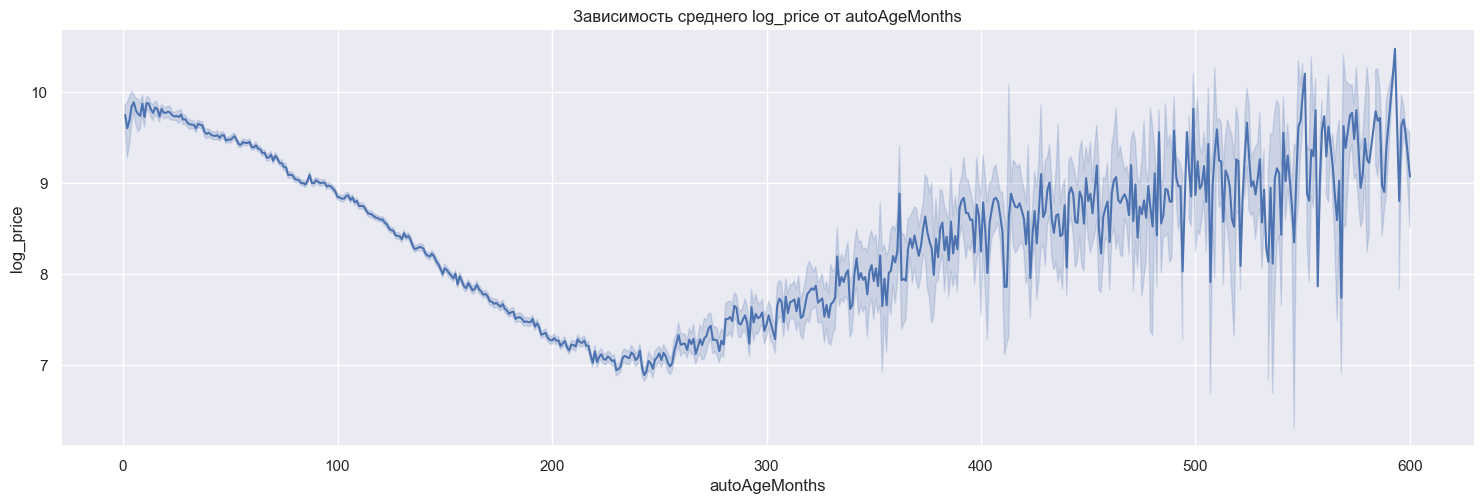

In [94]:
sns.relplot(
    data=df,
    x='autoAgeMonths',
    y='log_price',
    kind='line',
    height=5,
    aspect=3
).set(title='Зависимость среднего log_price от autoAgeMonths')

Сразу говорю, я увидел, что этот график имеет линейную зависимость, а точнее две, но идею идею добавить новый категориальный признак который будет разделять их на две мне подсказал Никита Бахишев.

но для начала посмотрим на распределение

Text(0.5, 1.0, 'Распределение autoAgeMonths')

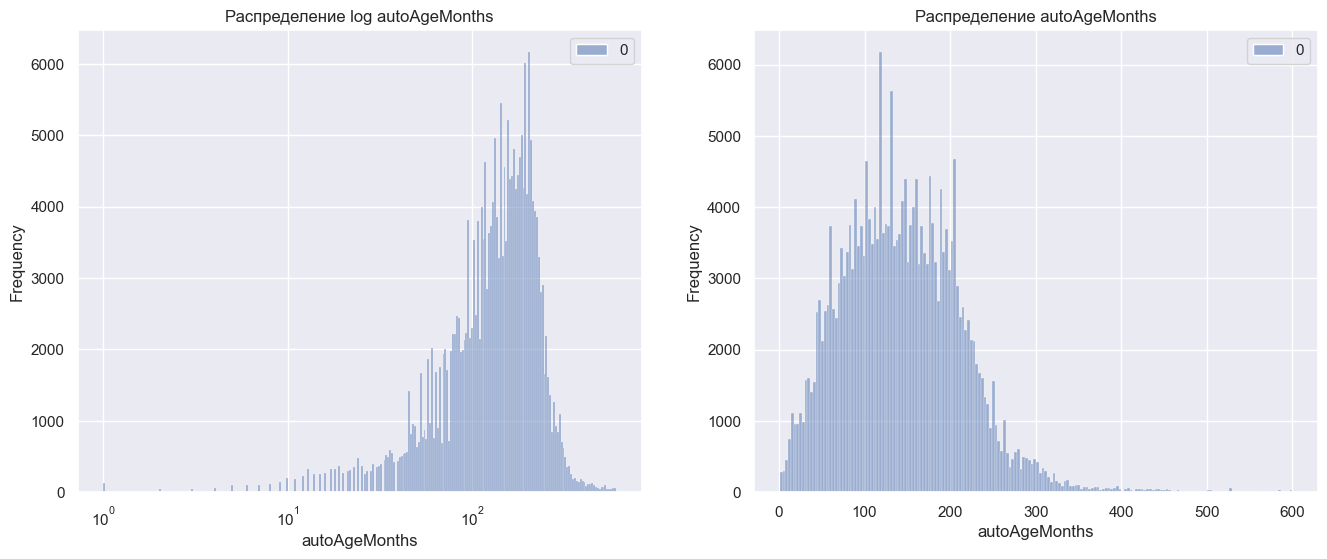

In [95]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(
    data=df.select(pl.col('autoAgeMonths')),
    ax=ax1,
    log_scale=True
)
sns.histplot(
    data=df.select(pl.col('autoAgeMonths')),
    ax=ax2
)
ax1.set_xlabel('autoAgeMonths')
ax1.set_ylabel('Frequency')
ax1.set_title('Распределение log autoAgeMonths')
ax2.set_xlabel('autoAgeMonths')
ax2.set_ylabel('Frequency')
ax2.set_title('Распределение autoAgeMonths')

что то, что это похоже на нормальное, поэтому посмотрим на матрицу корреляции

In [96]:
cor = df.with_columns(
    np.log1p(pl.col('autoAgeMonths').alias('log_autoAgeMonths'))
).select(['log_price', 'autoAgeMonths', 'log_autoAgeMonths'])
cor.corr()

log_price,autoAgeMonths,log_autoAgeMonths
f64,f64,f64
1.0,-0.650141,-0.681308
-0.650141,1.0,0.905526
-0.681308,0.905526,1.0


ну собсвенно нет смысла нагружать модель ради 3ёх сотых, поэтому пох пох пох

#### Попробуем создать свои признаки

Если они получатся норм, то можно и добавить их в модель

In [97]:
tmp = df.filter(pl.col('notRepairedDamage') == 'ja').group_by('autoAgeMonths').agg(pl.col('log_price').mean()).sort(pl.col('autoAgeMonths'))


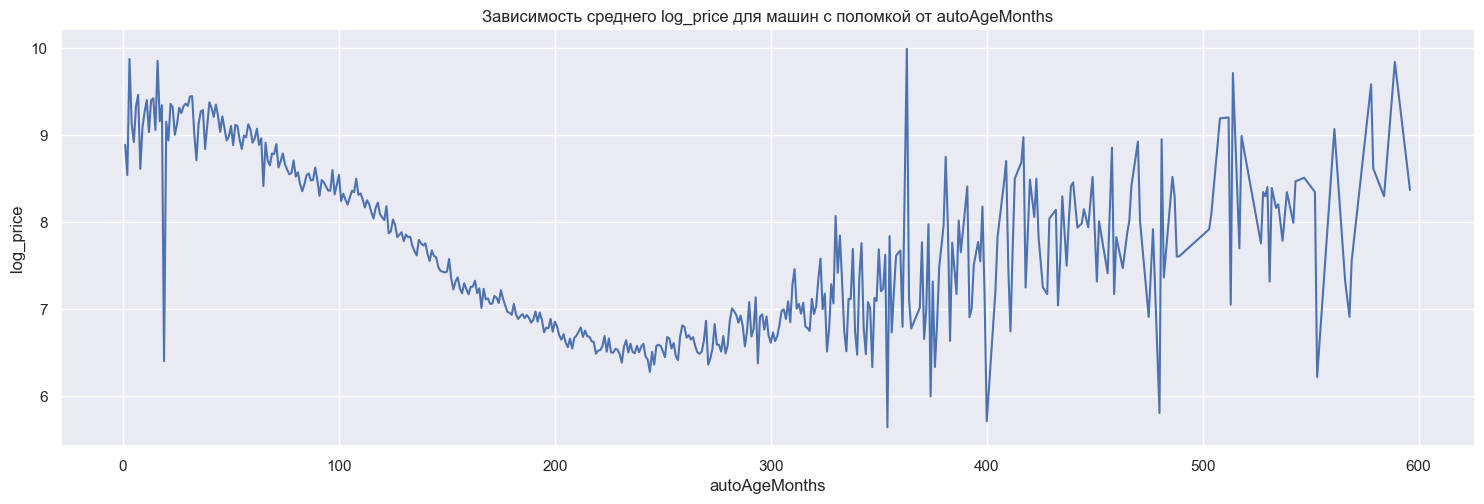

In [98]:
sns.relplot(
    data=tmp,
    x='autoAgeMonths',
    y='log_price',
    kind='line',
    height=5,
    aspect=3
).set(title='Зависимость среднего log_price для машин с поломкой от autoAgeMonths')

тренд сохраняется изза возраста, но увеличивается разброс, но судя пографику больше всего влияет возраст, надо посмотреть еще на что-то

In [99]:
tmp1 = df.filter((pl.col('autoAgeMonths') >= 300) & (pl.col('log_price') >= 8)).group_by('brand', 'model').agg(pl.col('log_price').mean()).sort(pl.col('brand'), pl.col('model'), pl.col('log_price'))

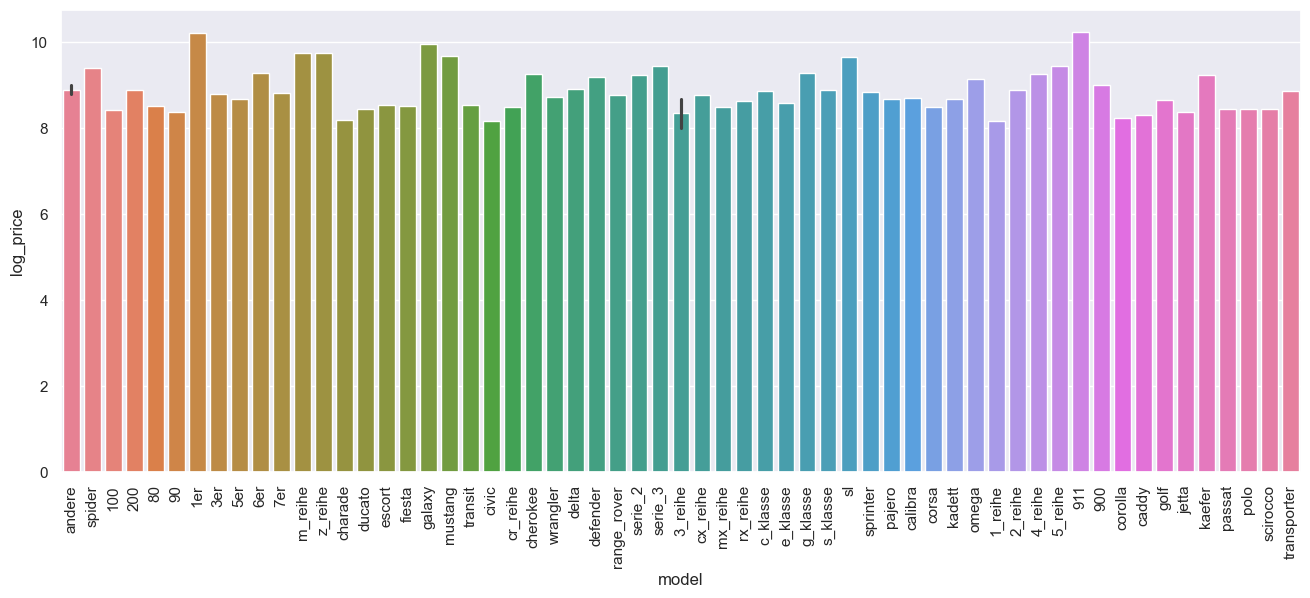

In [100]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(
    data=tmp1,
    x='model',
    y='log_price',
    hue='model',
    ax=ax
)
plt.xticks(rotation=90)  
plt.show()

опять таки турдно определить по этому признаку, но можно заметить что старая porse 911, bmw 1er, но надо проверить, не являются ли в принципе эти модели дорогими

In [101]:
df.filter((pl.col('model') == '911') | (pl.col('model') == '1er')).group_by('model').agg(pl.col('log_price').mean())

model,log_price
str,f64
"""911""",10.119623
"""1er""",9.22215


ну мы приходим к выводу, что данная переменная не будет никак влиять на нашу модель, поэтому есть только смысл делить по моделям автомобиля (что уже и так делается) и по годам

Поэтому добавим в модель переменную rare, которая будет показывать что машина очень старая (редкая)

In [102]:
df = df.with_columns(
    pl.when(pl.col('autoAgeMonths') >= 250).then(1).
    otherwise(0).alias('rare')
)

Text(0.5, 1.0, 'Зависимость log_price от rare')

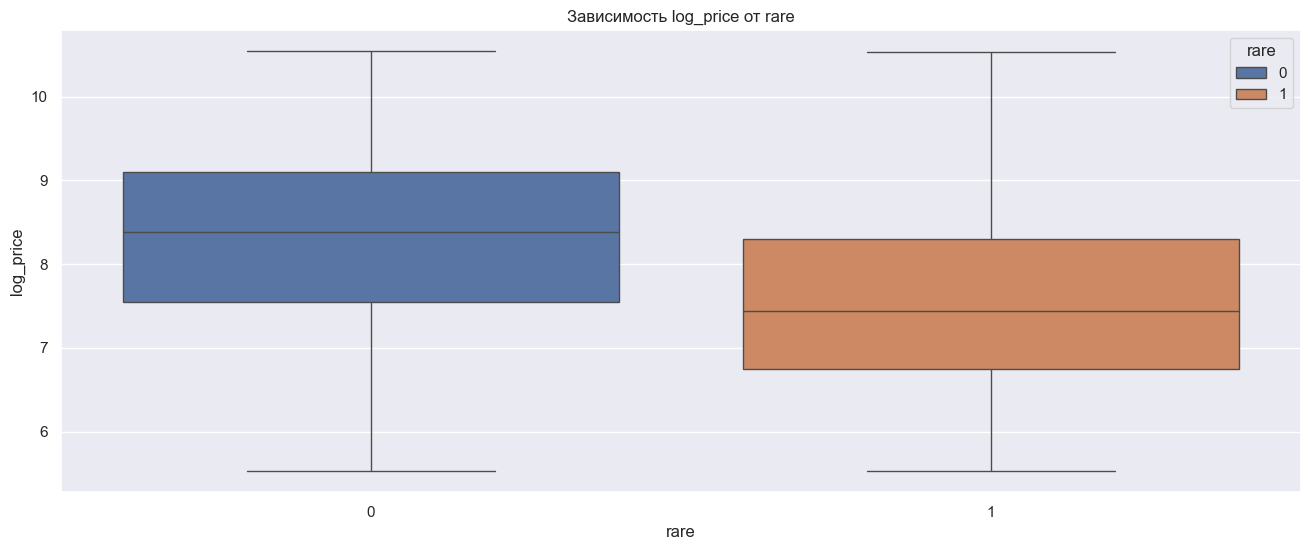

In [103]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='rare',
    y='log_price',
    hue='rare',
    ax=ax
)
ax.set_title("Зависимость log_price от rare")

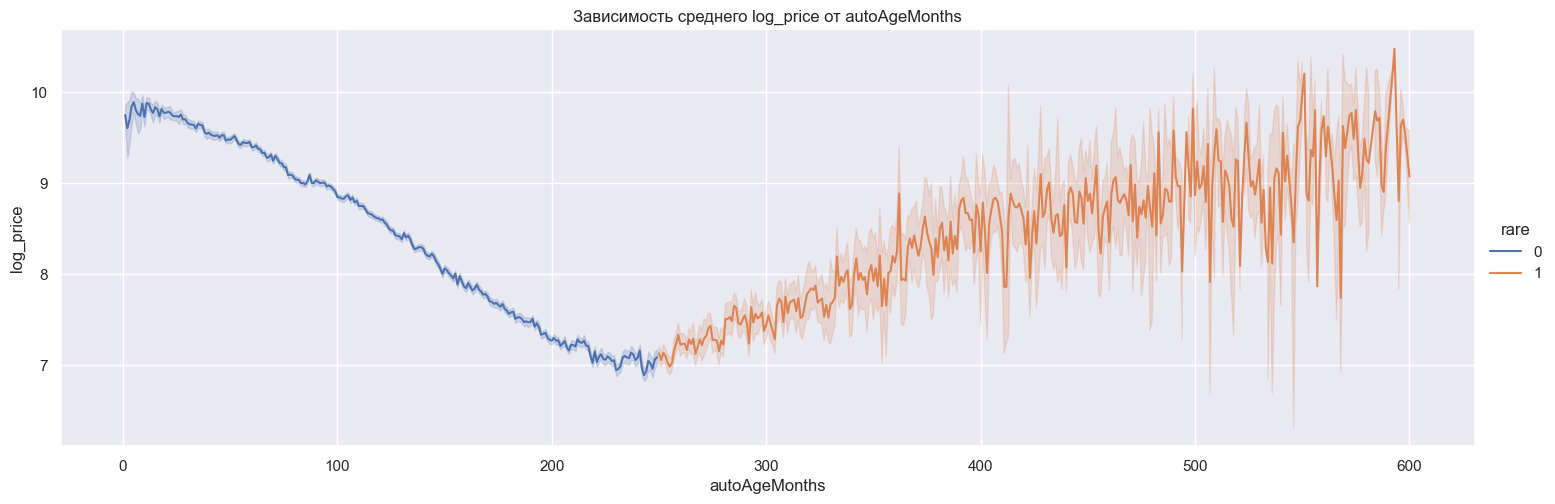

In [104]:
sns.relplot(
    data=df,
    x='autoAgeMonths',
    y='log_price',
    hue='rare',
    kind='line',
    height=5,
    aspect=3
).set(title='Зависимость среднего log_price от autoAgeMonths')

очевидно, это самое лучшее улучшение для модели, да мне немного подсказали, но не бейте пожалуйста, я на практике показал, что остальные изменения будут бесполезны

#### Раскидываем переменные 

In [105]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'rare']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []
data = df.to_pandas()

In [106]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price'].to_numpy()

In [107]:
x.shape[1]

11

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [110]:
from linear_regression import LinearRegression
from sklearn.metrics import r2_score

log_grid = np.logspace(start=-4, stop=-0.5, num=30)
best_lambda = {
    'full' : 0,
    'stochastic' : 0,
    'momentum' : 0,
    'adam' : 0
}
best_los = {
    'full' : 1e21,
    'stochastic' : 1e21,
    'momentum' : 1e21,
    'adam' : 1e21
}

# находим оптимальные лямбды
for method in ['full', 'stochastic', 'momentum', 'adam']:
    for i in log_grid:
        descent_config = {
            'descent_name': 'some name that we will replace in the future',
            'kwargs': {
                'dimension': x_val.shape[1],
                'lambda_' : i
            }
        }
        descent_config['descent_name'] = method
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, y_train)
        los = regression.calc_loss(x_val, y_val)
        if los < best_los[method]:
            best_los[method] = los
            best_lambda[method] = i

models = {}
# заново обучаем модели по train и считаем что просят
for method in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = method
    descent_config['kwargs']['lambda_'] = best_lambda[method]
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    y_pred_train = regression.predict(x_train)
    y_pred_test = regression.predict(x_test)
    models[method] = regression
    print('Descent model:', method)
    print(f'Лучшая лямбда: {best_lambda[method]}')
    print(f'Количество итераций до сходимости:', len(regression.loss_history))
    print(f'Для тренировочной выброки: MSE = {regression.calc_loss(x_train, y_train)}; R^2 = {r2_score(y_train, y_pred_train)}')
    print(f'Для тестовой выброки: MSE = {regression.calc_loss(x_test, y_test)}; R^2 = {r2_score(y_test, y_pred_test)}')
    print('--------------')

Descent model: full
Лучшая лямбда: 0.31622776601683794
Количество итераций до сходимости: 36
Для тренировочной выброки: MSE = 0.4376258154588805; R^2 = 0.6152137560945726
Для тестовой выброки: MSE = 0.44008859075242085; R^2 = 0.611379315355882
--------------
Descent model: stochastic
Лучшая лямбда: 0.31622776601683794
Количество итераций до сходимости: 165
Для тренировочной выброки: MSE = 0.35031992336929807; R^2 = 0.6919782089702251
Для тестовой выброки: MSE = 0.35355475315434354; R^2 = 0.6877931100301589
--------------
Descent model: momentum
Лучшая лямбда: 0.2395026619987486
Количество итераций до сходимости: 85
Для тренировочной выброки: MSE = 0.2806613792959323; R^2 = 0.75322608005801
Для тестовой выброки: MSE = 0.27838781031648047; R^2 = 0.7541693565452369
--------------
Descent model: adam
Лучшая лямбда: 0.31622776601683794
Количество итераций до сходимости: 206
Для тренировочной выброки: MSE = 0.22760431448151128; R^2 = 0.7998769584143981
Для тестовой выброки: MSE = 0.227996417

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [111]:
m = {
    'Descent model' : ['full', 'stochastic', 'momentum', 'adam'],
    'Lambda' : [best_lambda[i] for i in ['full', 'stochastic', 'momentum', 'adam']],
    'Iteration' : [len(models[i].loss_history) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_train' : [models[i].calc_loss(x_train, y_train) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_test' : [models[i].calc_loss(x_test, y_test) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_train' : [r2_score(y_train, models[i].predict(x_train)) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_test' : [r2_score(y_test, models[i].predict(x_test)) for i in ['full', 'stochastic', 'momentum', 'adam']]
}
metrics = pl.DataFrame(m)
print(metrics)

shape: (4, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ full          ┆ 0.316228 ┆ 36        ┆ 0.437626  ┆ 0.440089 ┆ 0.615214  ┆ 0.611379 │
│ stochastic    ┆ 0.316228 ┆ 165       ┆ 0.35032   ┆ 0.353555 ┆ 0.691978  ┆ 0.687793 │
│ momentum      ┆ 0.239503 ┆ 85        ┆ 0.280661  ┆ 0.278388 ┆ 0.753226  ┆ 0.754169 │
│ adam          ┆ 0.316228 ┆ 206       ┆ 0.227604  ┆ 0.227996 ┆ 0.799877  ┆ 0.798668 │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


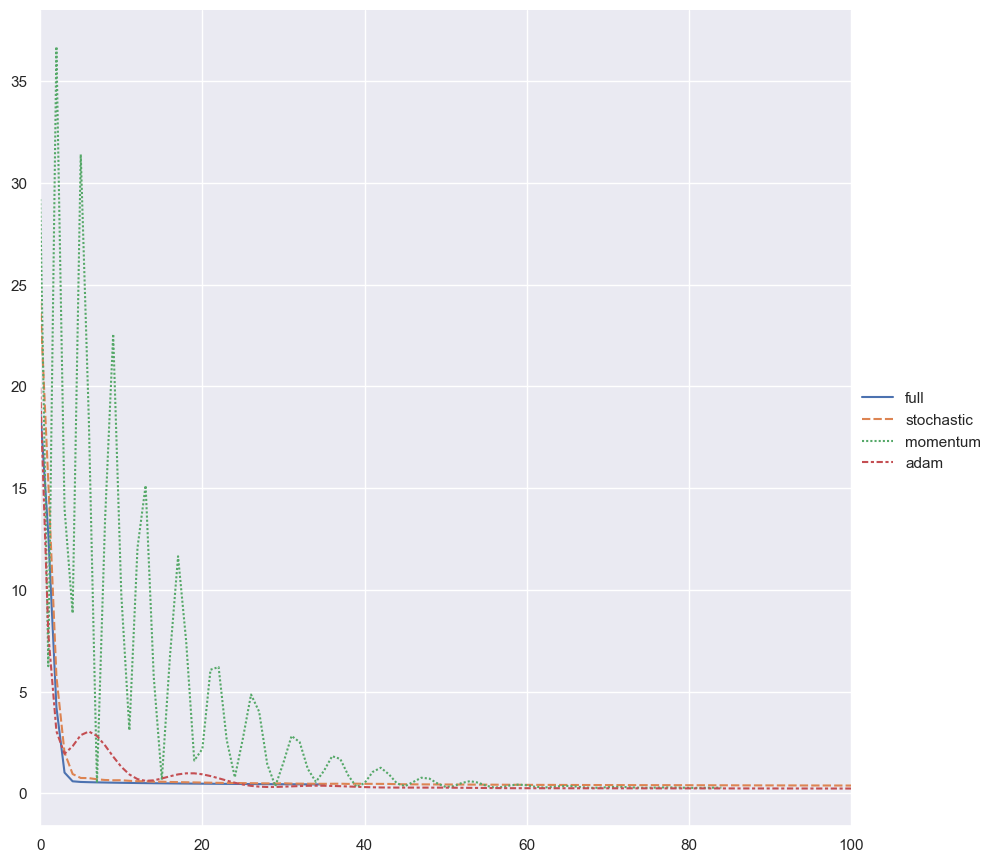

In [112]:
l = {
    i : models[i].loss_history for i in ['full', 'stochastic', 'momentum', 'adam']
}
sns.relplot(
    data=l,
    kind='line',
    height=9,
    aspect=1
).set(xlim=(0,100))

Смотря на полученные метрики и графики, можно сделать вывод, что Adam работает лучше всех, и на одинаковом количестве итераций уже выдаёт самую низкую ошибку, но он неугомонный и хочет дальше улучшать, поэтому работает долго, очень долго.

Ванильный метод работает быстро, проблем нет, но страдает точнность, прилично так.

Стохастик работает более менее, но оооочень долго для своей точности, лучше тогда использовать Momentum, он и идейно веселее, работает быстрее, так еще и точнее. Но мем что мы направление к маниимуму по градиенту сглаживаем, а MSE наш шарашит нехило, но зато он быстро выходит на хорошую точность.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [113]:
import time
from linear_regression import LinearRegression
from sklearn.metrics import r2_score

batch_sizes = np.arange(5, 500, 10)
batch_iter_time = {}

for bs in batch_sizes:
    descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': best_lambda['stochastic'],
                'batch_size': bs
            }
        }
    times = []
    iters = []
    for _ in range(10):
        regression = LinearRegression(descent_config=descent_config)
        start_fit = time.time()
        regression.fit(x_train, y_train)
        end_fit = time.time()
        times.append(end_fit - start_fit)
        iters.append(len(regression.loss_history))
    t = np.mean(times)
    i = np.mean(iters)
    batch_iter_time[bs] = [i, t]
    
for key in batch_iter_time:
    b = key
    i = batch_iter_time[key][0]
    t = batch_iter_time[key][1]
    print(f'размер батча: {b}, количество итераций для сходимоси: {i}, время: {t}')


размер батча: 5, количество итераций для сходимоси: 188.1, время: 0.2599365711212158
размер батча: 15, количество итераций для сходимоси: 192.0, время: 0.2517623662948608
размер батча: 25, количество итераций для сходимоси: 175.7, время: 0.23055565357208252
размер батча: 35, количество итераций для сходимоси: 142.3, время: 0.18698518276214598
размер батча: 45, количество итераций для сходимоси: 138.1, время: 0.1825434923171997
размер батча: 55, количество итераций для сходимоси: 129.9, время: 0.17204174995422364
размер батча: 65, количество итераций для сходимоси: 112.8, время: 0.1496445894241333
размер батча: 75, количество итераций для сходимоси: 106.2, время: 0.14760301113128663
размер батча: 85, количество итераций для сходимоси: 103.6, время: 0.1499788522720337
размер батча: 95, количество итераций для сходимоси: 89.9, время: 0.12650327682495116
размер батча: 105, количество итераций для сходимоси: 88.7, время: 0.12606093883514405
размер батча: 115, количество итераций для сходимо

In [114]:
batch_sizes = list(batch_iter_time.keys())
iters = [value[0] for value in batch_iter_time.values()]  
times = [value[1] for value in batch_iter_time.values()]


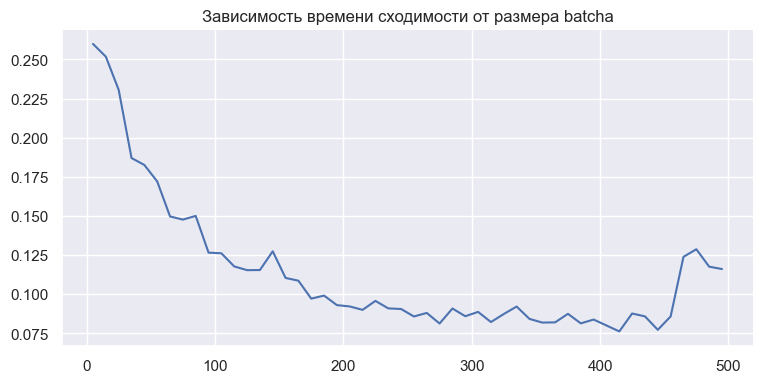

In [115]:

sns.relplot(
    x=batch_sizes,
    y=times,
    kind='line',
    height=4,
    aspect=2
).set(title='Зависимость времени сходимости от размера batcha')

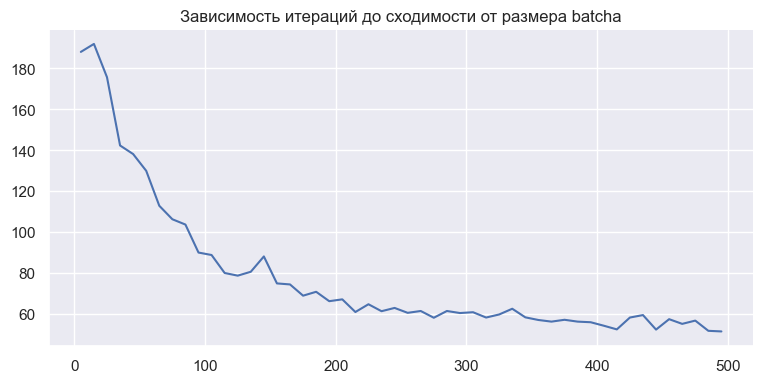

In [116]:
sns.relplot(
    x=batch_sizes,
    y=iters,
    kind='line',
    height=4,
    aspect=2
).set(title='Зависимость итераций до сходимости от размера batcha') 

Ну и при увеличении batch_size мы уменьшаем градиент, следовательно не перескакиваем нашу точку минимума, а также будем более оптимально двигаться, поскольку лучше очениваем градиент, поэтому, при росте данного параметра, количесто итераций и времени становится меньше

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:  https://contest.yandex.ru/contest/70588/run-report/124802680/ 

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [117]:
from linear_regression import LinearRegression
from sklearn.metrics import r2_score

log_grid = np.logspace(start=-4, stop=-0.5, num=30)
mu_grid = np.logspace(start=-4, stop=0, num=5)
best_lambda_reg = {
    'full' : 0,
    'stochastic' : 0,
    'momentum' : 0,
    'adam' : 0
}
best_los_reg = {
    'full' : 1e21,
    'stochastic' : 1e21,
    'momentum' : 1e21,
    'adam' : 1e21
}
best_mu_reg = {
    'full' : 0,
    'stochastic' : 0,
    'momentum' : 0,
    'adam' : 0
}
# находим оптимальные лямбды и mu 
for method in ['full', 'stochastic', 'momentum', 'adam']:
    for i in log_grid:
        for j in mu_grid:
            descent_config = {
                'descent_name': 'some name that we will replace in the future',
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_' : i,
                    'mu' : j
                },
                'regularized': True
            }
            descent_config['descent_name'] = method
            regression = LinearRegression(descent_config=descent_config)
            regression.fit(x_train, y_train)
            los = regression.calc_loss(x_val, y_val)
            if los < best_los_reg[method]:
                best_los_reg[method] = los
                best_lambda_reg[method] = i
                best_mu_reg[method] = j

models_reg = {}
# заново обучаем модели по train и считаем что просят
for method in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = method
    descent_config['kwargs']['lambda_'] = best_lambda_reg[method]
    descent_config['kwargs']['mu'] = best_mu_reg[method]
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    y_pred_train = regression.predict(x_train)
    y_pred_test = regression.predict(x_test)
    models_reg[method] = regression
    print('Descent model:', method)
    print(f'Лучшая лямбда: {best_lambda_reg[method]}')
    print(f'Лучшая mu: {best_mu_reg[method]}')
    print(f'Количество итераций до сходимости:', len(regression.loss_history))
    print(f'Для тренировочной выброки: MSE = {regression.calc_loss(x_train, y_train)}; R^2 = {r2_score(y_train, y_pred_train)}')
    print(f'Для тестовой выброки: MSE = {regression.calc_loss(x_test, y_test)}; R^2 = {r2_score(y_test, y_pred_test)}')
    print('--------------')

Descent model: full
Лучшая лямбда: 0.31622776601683794
Лучшая mu: 0.1
Количество итераций до сходимости: 215
Для тренировочной выброки: MSE = 0.3372826555661765; R^2 = 0.7034413382728062
Для тестовой выброки: MSE = 0.3414068172332453; R^2 = 0.6985203573932397
--------------
Descent model: stochastic
Лучшая лямбда: 0.31622776601683794
Лучшая mu: 0.1
Количество итераций до сходимости: 260
Для тренировочной выброки: MSE = 0.3290810577503041; R^2 = 0.7106526633503345
Для тестовой выброки: MSE = 0.33193185169230477; R^2 = 0.7068872355011325
--------------
Descent model: momentum
Лучшая лямбда: 0.31622776601683794
Лучшая mu: 0.01
Количество итераций до сходимости: 213
Для тренировочной выброки: MSE = 0.24638448592256215; R^2 = 0.7833643319343413
Для тестовой выброки: MSE = 0.24599902227518017; R^2 = 0.7827703092804198
--------------
Descent model: adam
Лучшая лямбда: 0.31622776601683794
Лучшая mu: 0.0001
Количество итераций до сходимости: 225
Для тренировочной выброки: MSE = 0.22900041871054

In [118]:
m2 = {
    'Descent model' : ['full_reg', 'stochastic_reg', 'momentum_reg', 'adam_reg'],
    'Lambda' : [best_lambda_reg[i] for i in ['full', 'stochastic', 'momentum', 'adam']],
    'Mu' : [best_mu_reg[i] for i in ['full', 'stochastic', 'momentum', 'adam']],
    'Iteration' : [len(models_reg[i].loss_history) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_train' : [models_reg[i].calc_loss(x_train, y_train) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_test' : [models_reg[i].calc_loss(x_test, y_test) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_train' : [r2_score(y_train, models_reg[i].predict(x_train)) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_test' : [r2_score(y_test, models_reg[i].predict(x_test)) for i in ['full', 'stochastic', 'momentum', 'adam']]
}
metrics2 = pl.DataFrame(m2)
print(metrics2)

shape: (4, 8)
┌────────────────┬──────────┬────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model  ┆ Lambda   ┆ Mu     ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---            ┆ ---      ┆ ---    ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str            ┆ f64      ┆ f64    ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞════════════════╪══════════╪════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ full_reg       ┆ 0.316228 ┆ 0.1    ┆ 215       ┆ 0.337283  ┆ 0.341407 ┆ 0.703441  ┆ 0.69852  │
│ stochastic_reg ┆ 0.316228 ┆ 0.1    ┆ 260       ┆ 0.329081  ┆ 0.331932 ┆ 0.710653  ┆ 0.706887 │
│ momentum_reg   ┆ 0.316228 ┆ 0.01   ┆ 213       ┆ 0.246384  ┆ 0.245999 ┆ 0.783364  ┆ 0.78277  │
│ adam_reg       ┆ 0.316228 ┆ 0.0001 ┆ 225       ┆ 0.229     ┆ 0.229563 ┆ 0.798649  ┆ 0.797284 │
└────────────────┴──────────┴────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [119]:
metrics_compare = pl.concat([metrics, metrics2.drop('Mu')], how='vertical').sort('Descent model')

In [120]:
print(metrics_compare.filter((pl.col('Descent model') == "full") | (pl.col('Descent model') == "full_reg")))

shape: (2, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ full          ┆ 0.316228 ┆ 36        ┆ 0.437626  ┆ 0.440089 ┆ 0.615214  ┆ 0.611379 │
│ full_reg      ┆ 0.316228 ┆ 215       ┆ 0.337283  ┆ 0.341407 ┆ 0.703441  ┆ 0.69852  │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [121]:
print(metrics_compare.filter((pl.col('Descent model') == "stochastic") | (pl.col('Descent model') == "stochastic_reg")))

shape: (2, 7)
┌────────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model  ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---            ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str            ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞════════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ stochastic     ┆ 0.316228 ┆ 165       ┆ 0.35032   ┆ 0.353555 ┆ 0.691978  ┆ 0.687793 │
│ stochastic_reg ┆ 0.316228 ┆ 260       ┆ 0.329081  ┆ 0.331932 ┆ 0.710653  ┆ 0.706887 │
└────────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [122]:
print(metrics_compare.filter((pl.col('Descent model') == "momentum") | (pl.col('Descent model') == "momentum_reg")))

shape: (2, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ momentum      ┆ 0.239503 ┆ 85        ┆ 0.280661  ┆ 0.278388 ┆ 0.753226  ┆ 0.754169 │
│ momentum_reg  ┆ 0.316228 ┆ 213       ┆ 0.246384  ┆ 0.245999 ┆ 0.783364  ┆ 0.78277  │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [123]:
print(metrics_compare.filter((pl.col('Descent model') == "adam") | (pl.col('Descent model') == "adam_reg")))

shape: (2, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ adam          ┆ 0.316228 ┆ 206       ┆ 0.227604  ┆ 0.227996 ┆ 0.799877  ┆ 0.798668 │
│ adam_reg      ┆ 0.316228 ┆ 225       ┆ 0.229     ┆ 0.229563 ┆ 0.798649  ┆ 0.797284 │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


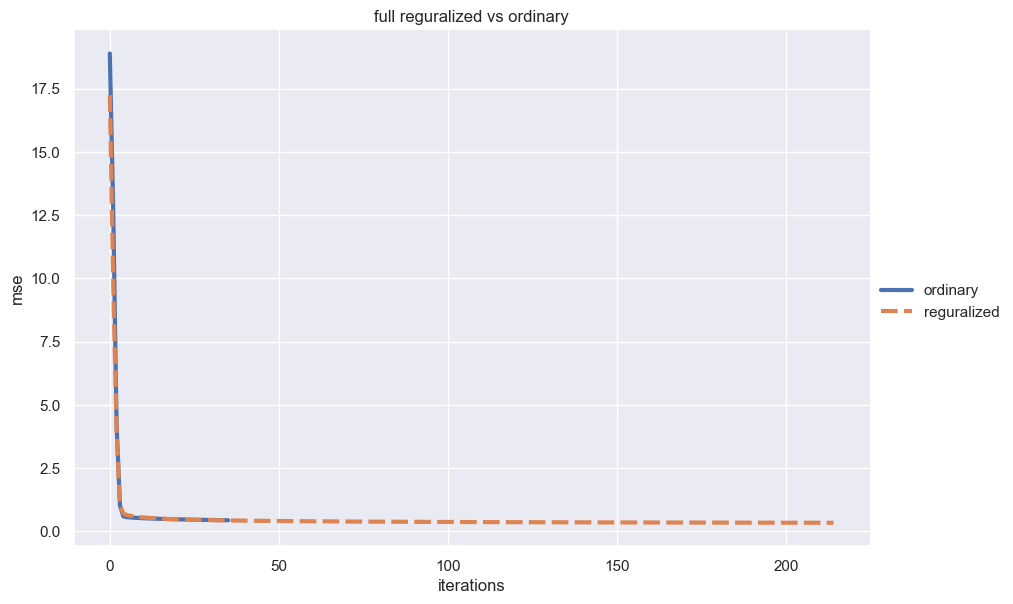

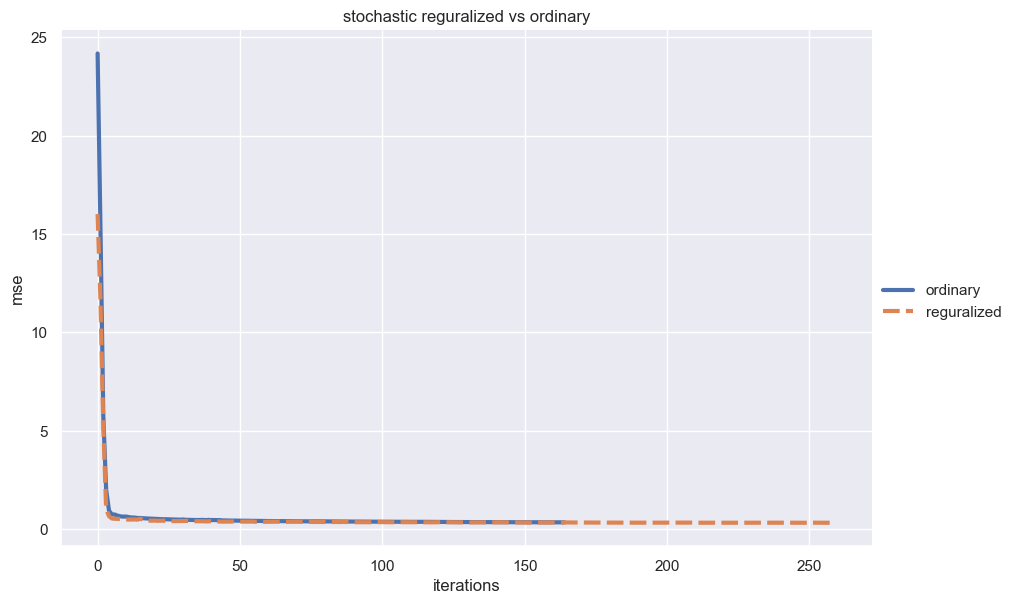

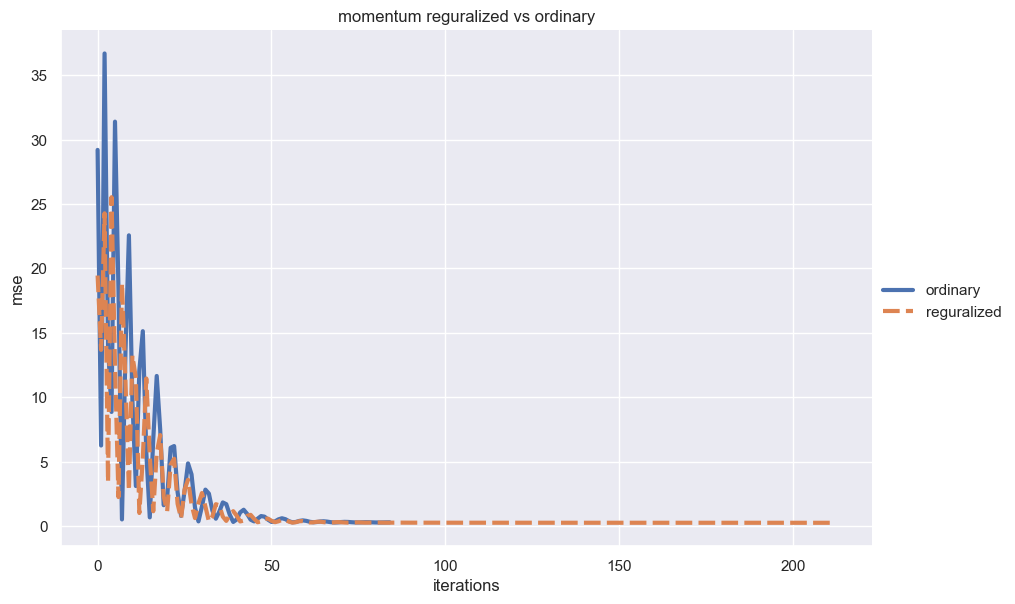

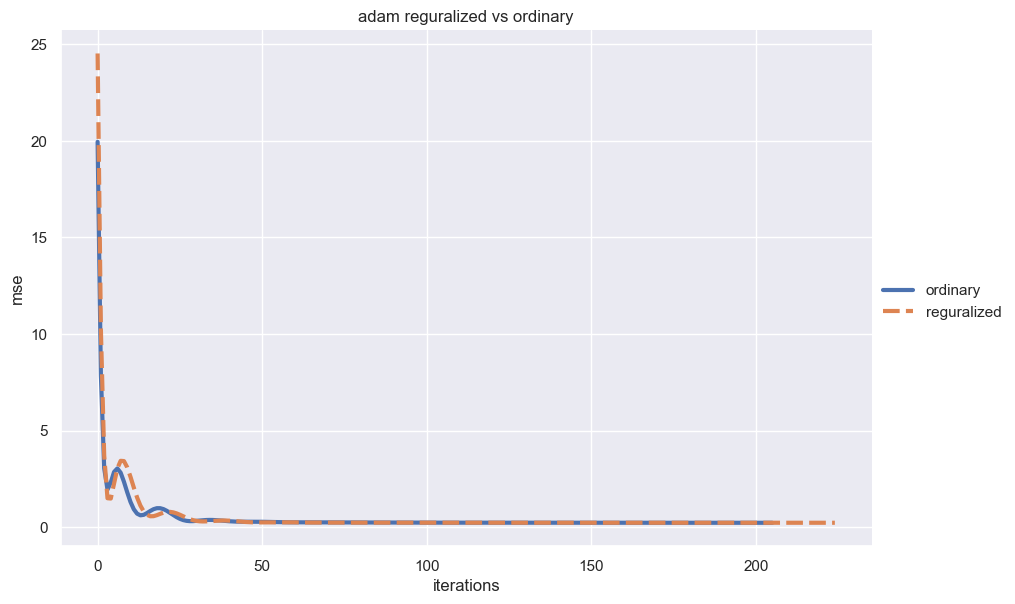

In [124]:
l_reg = {
    i : models_reg[i].loss_history for i in ['full', 'stochastic', 'momentum', 'adam']
}
full = {'ordinary': l['full'], 'reguralized': l_reg['full']}
stochastic = {'ordinary': l['stochastic'], 'reguralized': l_reg['stochastic']}
momentum = {'ordinary': l['momentum'], 'reguralized': l_reg['momentum']}
adam = {'ordinary': l['adam'], 'reguralized': l_reg['adam']}
sns.relplot(full,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='full reguralized vs ordinary', xlabel='iterations', ylabel='mse')
sns.relplot(stochastic,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='stochastic reguralized vs ordinary', xlabel='iterations', ylabel='mse')
sns.relplot(momentum,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='momentum reguralized vs ordinary', xlabel='iterations', ylabel='mse')
sns.relplot(adam,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='adam reguralized vs ordinary', xlabel='iterations', ylabel='mse')

Как итог, почти везде и на трейне и на тесте метрики улучшились, регуляризация работает, но мы жертвуем скоростью, количество итераций заметно возрасло

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

\begin{align}
    &L(w) = \log\left(\cosh(x_iw- y)\right), \text{где } x_i - i-я \text{строка матрицы } x \\
    &f(x) = log(x), \ g(y) = cosh(y), \ h(w) = x_iw - y_i \\
    &L(w) = (f(g(h(w)))) \\
    &df(g(h(w)))[w] = df(g(h(w))) \times dg(h(w)) \times dh \times dw - / \text{формула дифференцирования сложной функции} /
\end{align}
представим в виде производной $\times$ приращение:
\begin{align}
&dh(w) = d(x_iw - y_i) = d(x_iw) = x_idw \\
&dg(y) = d(\cosh(y)) = d(\frac{e^{y} + e^{-y}}{2}) = \frac{1}{2}(e^{y} - e^{-y})dy = \sh(y)dy \\ 
&df(x) = d(\log(x)) = \frac{1}{x}dx \\ 
\end{align}
получаем:

$$df(w) = \frac{\sh(x_iw - y_i)}{\cosh(x_iw - y_i)}x_idw = \th(x_iw - y_i)x_idw$$

функционал = $Q(w) = \frac{1}{l}\sum_{i = 1}^{\ell}\log\left(\cosh(x_iw- y_i)\right)$

Используя вычисления выше, получим: $dQ(w) = \th(Xw - y)^{T}Xdw$

$$\nabla_w Q = \frac{1}{\ell}\left(\th(Xw - y)^{T}X\right)^T = \frac{1}{\ell}X^T\th(Xw - y)$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [125]:
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from descents import LossFunction

log_grid = np.logspace(start=-4, stop=1, num=20)
best_lambda_LogCosh= {
    'full' : 0,
    'stochastic' : 0,
    'momentum' : 0,
    'adam' : 0
}
best_los_LogCosh = {
    'full' : 1e21,
    'stochastic' : 1e21,
    'momentum' : 1e21,
    'adam' : 1e21
}

# находим оптимальные лямбды
for method in ['full', 'stochastic', 'momentum', 'adam']:
    for i in log_grid:
        descent_config = {
            'descent_name': 'some name that we will replace in the future',
            'kwargs': {
                'dimension': x_val.shape[1],
                'lambda_' : i,
                'loss_function': LossFunction.LogCosh
            }
        }
        descent_config['descent_name'] = method
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, y_train)
        los = regression.calc_loss(x_val, y_val)
        if los < best_los_LogCosh[method]:
            best_los_LogCosh[method] = los
            best_lambda_LogCosh[method] = i

models_LogCosh = {}
# заново обучаем модели по train и считаем что просят
for method in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = method
    descent_config['kwargs']['lambda_'] = best_lambda_LogCosh[method]
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    y_pred_train = regression.predict(x_train)
    y_pred_test = regression.predict(x_test)
    models_LogCosh[method] = regression
    print('Descent model с LogCosh:', method)
    print(f'Лучшая лямбда: {best_lambda_LogCosh[method]}')
    print(f'Количество итераций до сходимости:', len(regression.loss_history))
    print(f'Для тренировочной выброки: MSE = {regression.calc_loss(x_train, y_train)}; R^2 = {r2_score(y_train, y_pred_train)}')
    print(f'Для тестовой выброки: MSE = {regression.calc_loss(x_test, y_test)}; R^2 = {r2_score(y_test, y_pred_test)}')
    print('--------------')

Descent model с LogCosh: full
Лучшая лямбда: 5.455594781168514
Количество итераций до сходимости: 129
Для тренировочной выброки: MSE = 0.11825869173381214; R^2 = 0.7368314569321033
Для тестовой выброки: MSE = 0.11910916943066117; R^2 = 0.7346029672170087
--------------
Descent model с LogCosh: stochastic
Лучшая лямбда: 5.455594781168514
Количество итераций до сходимости: 301
Для тренировочной выброки: MSE = 0.10785602792727106; R^2 = 0.7598865583724633
Для тестовой выброки: MSE = 0.10859653514705542; R^2 = 0.7578296593572904
--------------
Descent model с LogCosh: momentum
Лучшая лямбда: 5.455594781168514
Количество итераций до сходимости: 196
Для тренировочной выброки: MSE = 0.09453087452586083; R^2 = 0.7855446478042263
Для тестовой выброки: MSE = 0.09531269911198098; R^2 = 0.7836395964388017
--------------
Descent model с LogCosh: adam
Лучшая лямбда: 2.9763514416313193
Количество итераций до сходимости: 301
Для тренировочной выброки: MSE = 0.09031178394929182; R^2 = 0.796323647389325

In [126]:
m3 = {
    'Descent model' : ['full_LogCosh', 'stochastic_LogCosh', 'momentum_LogCosh', 'adam_LogCosh'],
    'Lambda' : [best_lambda_LogCosh[i] for i in ['full', 'stochastic', 'momentum', 'adam']],
    'Iteration' : [len(models_LogCosh[i].loss_history) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_train' : [models_LogCosh[i].calc_loss(x_train, y_train) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'MSE_test' : [models_LogCosh[i].calc_loss(x_test, y_test) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_train' : [r2_score(y_train, models_LogCosh[i].predict(x_train)) for i in ['full', 'stochastic', 'momentum', 'adam']],
    'R^2_test' : [r2_score(y_test, models_LogCosh[i].predict(x_test)) for i in ['full', 'stochastic', 'momentum', 'adam']]
}
metrics3 = pl.DataFrame(m3)
print(metrics3)

shape: (4, 7)
┌────────────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model      ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---                ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str                ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞════════════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ full_LogCosh       ┆ 5.455595 ┆ 129       ┆ 0.118259  ┆ 0.119109 ┆ 0.736831  ┆ 0.734603 │
│ stochastic_LogCosh ┆ 5.455595 ┆ 301       ┆ 0.107856  ┆ 0.108597 ┆ 0.759887  ┆ 0.75783  │
│ momentum_LogCosh   ┆ 5.455595 ┆ 196       ┆ 0.094531  ┆ 0.095313 ┆ 0.785545  ┆ 0.78364  │
│ adam_LogCosh       ┆ 2.976351 ┆ 301       ┆ 0.090312  ┆ 0.091212 ┆ 0.796324  ┆ 0.793809 │
└────────────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [127]:
metrics_compare2 = pl.concat([metrics, metrics3], how='vertical').sort('Descent model')
metrics_compare2

Descent model,Lambda,Iteration,MSE_train,MSE_test,R^2_train,R^2_test
str,f64,i64,f64,f64,f64,f64
"""adam""",0.316228,206,0.227604,0.227996,0.799877,0.798668
"""adam_LogCosh""",2.976351,301,0.090312,0.091212,0.796324,0.793809
"""full""",0.316228,36,0.437626,0.440089,0.615214,0.611379
"""full_LogCosh""",5.455595,129,0.118259,0.119109,0.736831,0.734603
"""momentum""",0.239503,85,0.280661,0.278388,0.753226,0.754169
"""momentum_LogCosh""",5.455595,196,0.094531,0.095313,0.785545,0.78364
"""stochastic""",0.316228,165,0.35032,0.353555,0.691978,0.687793
"""stochastic_LogCosh""",5.455595,301,0.107856,0.108597,0.759887,0.75783


In [128]:
print(metrics_compare2.filter((pl.col('Descent model') == "full") | (pl.col('Descent model') == "full_LogCosh")))

shape: (2, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ full          ┆ 0.316228 ┆ 36        ┆ 0.437626  ┆ 0.440089 ┆ 0.615214  ┆ 0.611379 │
│ full_LogCosh  ┆ 5.455595 ┆ 129       ┆ 0.118259  ┆ 0.119109 ┆ 0.736831  ┆ 0.734603 │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [129]:
print(metrics_compare2.filter((pl.col('Descent model') == "stochastic") | (pl.col('Descent model') == "stochastic_LogCosh")))

shape: (2, 7)
┌────────────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model      ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---                ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str                ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞════════════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ stochastic         ┆ 0.316228 ┆ 165       ┆ 0.35032   ┆ 0.353555 ┆ 0.691978  ┆ 0.687793 │
│ stochastic_LogCosh ┆ 5.455595 ┆ 301       ┆ 0.107856  ┆ 0.108597 ┆ 0.759887  ┆ 0.75783  │
└────────────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [130]:
print(metrics_compare2.filter((pl.col('Descent model') == "momentum") | (pl.col('Descent model') == "momentum_LogCosh")))

shape: (2, 7)
┌──────────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model    ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---              ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str              ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞══════════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ momentum         ┆ 0.239503 ┆ 85        ┆ 0.280661  ┆ 0.278388 ┆ 0.753226  ┆ 0.754169 │
│ momentum_LogCosh ┆ 5.455595 ┆ 196       ┆ 0.094531  ┆ 0.095313 ┆ 0.785545  ┆ 0.78364  │
└──────────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


In [131]:
print(metrics_compare2.filter((pl.col('Descent model') == "adam") | (pl.col('Descent model') == "adam_LogCosh")))

shape: (2, 7)
┌───────────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┐
│ Descent model ┆ Lambda   ┆ Iteration ┆ MSE_train ┆ MSE_test ┆ R^2_train ┆ R^2_test │
│ ---           ┆ ---      ┆ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ str           ┆ f64      ┆ i64       ┆ f64       ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════╪══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╡
│ adam          ┆ 0.316228 ┆ 206       ┆ 0.227604  ┆ 0.227996 ┆ 0.799877  ┆ 0.798668 │
│ adam_LogCosh  ┆ 2.976351 ┆ 301       ┆ 0.090312  ┆ 0.091212 ┆ 0.796324  ┆ 0.793809 │
└───────────────┴──────────┴───────────┴───────────┴──────────┴───────────┴──────────┘


Всё улучшилось, причем нормально так, кроме адама, что старнно

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [132]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [133]:
# YOUR CODE: